<a href="https://colab.research.google.com/github/Amandine0610/linear_regression_model/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor


ModuleNotFoundError: No module named 'matplotlib'

In [6]:
# Load dataset
df = pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')

In [7]:
# Handling categorical variables
encoder = LabelEncoder()
df['Product_Category'] = encoder.fit_transform(df['Product_Category'])
df['Customer_Segment'] = encoder.fit_transform(df['Customer_Segment'])


In [8]:
# Selecting features and target variable
X = df[['Product_Category', 'Price', 'Discount', 'Customer_Segment', 'Marketing_Spend']]
y = df['Units_Sold']


In [9]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Linear Regression using Gradient Descent
lr_model = SGDRegressor(max_iter=1000, learning_rate='optimal', eta0=0.01)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [16]:
# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [17]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [18]:
# Display results
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Linear Regression MSE: 103.5189
Decision Tree MSE: 108.5600
Random Forest MSE: 60.5806


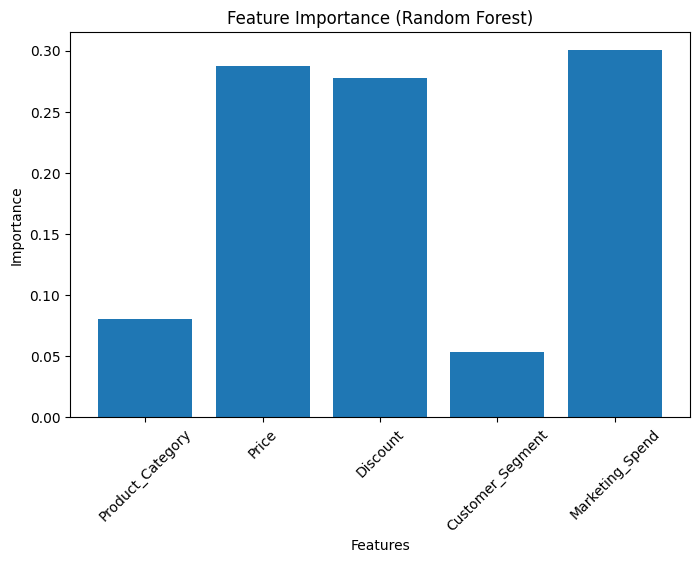

In [19]:
# Plotting feature importance for Random Forest
plt.figure(figsize=(8,5))
plt.bar(X.columns, rf_model.feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Determine the best model based on lowest MSE
mse_scores = {"SGDRegressor": mse_lr, "DecisionTree": mse_dt, "RandomForest": mse_rf}
best_model_name = min(mse_scores, key=mse_scores.get)  # Model with lowest MSE

print(f"Best model: {best_model_name}")



Best model: RandomForest


In [1]:
import joblib

# Save the best model (Random Forest)
joblib.dump(rf_model, "sales_forecasting_model.pkl")
print("Random Forest model saved successfully!")


NameError: name 'rf_model' is not defined

In [25]:
from google.colab import files

# Download the saved model
files.download("sales_forecasting_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>